# Exercise

The begining of the text is mostly present, as seen during the course, as a reminder of the context of the exercise. The «real» exercise starts at the section entitled _Debugging_.

# Computing the sum $H_n=\sum_{i=1}^n \frac{1}{n}$

We will try to use Python to compute the sum : $H_n=\sum_{i=1}^n \frac{1}{n}$ with the best possible precision, knowing that the real number format used in python (like most language) is of finite precision.

## Aim
The final aim of this exercise is to have a bit better _intuitive understanding_ of the effects of finite precision real numbers on computational intensive tasks, and how useful it may be to perform a computation through a _smart_ scheme rather than using a _naive_ approach.

## Precision
To be able to test the effect of precision, we will be using the `numpy` which provides the three precision levels that we will be using : `float16`, `float32`, `float64`. And we will be performing the computations using these three levels of precision

In [1]:
## Performing the summation up to :
n = 100000

## Implementing the summation in the «naive» way
import math
import numpy

## short hands for explicit type conversion functions :
f16 = numpy.float16
f32 = numpy.float32
f64 = numpy.float64

H16 = f16(0)
H32 = f32(0)
H64 = f64(0)

for i in range(1, n+1) :
    H16 = numpy.add(H16, f16(1/i))
    H32 = numpy.add(H32, f32(1/i))
    H64 = numpy.add(H64, f64(1/i))

print("n=%d : H64=%6.3f, H32=%6.3f, H16=%6.3f" % (n, H64, H32, H16))

n=100000 : H64=12.090, H32=12.091, H16= 7.086


## Computing some bounds to $H_n=\sum_{i=1}^n \frac{1}{n}$

Using the rectangle summation method to compute $\int_{x=1}^n \frac{1}{x} dx = \ln(x)$, and since $\frac{1}{x}$ is a monotonous function one can check that we have lower and upper bounds :

$$H_n - 1 < \ln(n) < H_n - \frac{1}{n}$$

From this we conclude that :

$$ \ln(n) + \frac{1}{n} < H_n < \ln(n) + 1 $$

To go even further in term of bounding of $H_n$ one can consider the [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Since the $\frac{1}{x}$ is convex, the trapezoidal rule gives a upper bound, which is closer to the integral compared to the approximation given by the rectangle method.

The trapezoidal rule gives the bound :

$$ \ln(n) < \frac{1}{2}( H_n - 1 + H_n - \frac{1}{n} ) = H_n - \frac{1}{2} - \frac{1}{2n}$$

Which gives us a lower bound on $H_n$ : 

$$ \ln(n) + \frac{1}{2} + \frac{1}{2n} < H_n $$

Leading to a closer interval, with the summation closer to its lower bound:

$$ \ln(n) + \frac{1}{2} + \frac{1}{2n} < H_n < \ln(n) + 1 $$

In [2]:
## Performing the summation up to :
n = 100000 ## Then test with n = 1000000

## Implementing the summation in the «naive» way
import math
import numpy

f16 = numpy.float16
f32 = numpy.float32
f64 = numpy.float64

H16 = f16(0)
H32 = f32(0)
H64 = f64(0)

for i in range(1, n+1, 1) :
    H16 = numpy.add(H16, f16(1/i))
    H32 = numpy.add(H32, f32(1/i))
    H64 = numpy.add(H64, f64(1/i))

print("n=%d : %6.3f <= H64=%6.3f, H32=%6.3f, H16=%6.3f <= %6.3f" % (n, math.log(n)+1/n, H64, H32, H16, math.log(n)+1))

## Using «better» bounds :
print("n=%d : %6.3f <= H64=%6.3f, H32=%6.3f, H16=%6.3f <= %6.3f" % (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1))

n=100000 : 11.513 <= H64=12.090, H32=12.091, H16= 7.086 <= 12.513
n=100000 : 12.013 <= H64=12.090, H32=12.091, H16= 7.086 <= 12.513


## First trial of getting more precise answer

A classical way to get a bit better results when summing numbers is to perform the summation from the last items (or to be more precise starting from the ones with smaller absolute values).

In [3]:
## Performing the summation up to :
n = 100000 ## Then test with n = 1000000

## Implementing the summation in the «naive» way
import math
import numpy

f16 = numpy.float16
f32 = numpy.float32
f64 = numpy.float64

H16 = f16(0)
H32 = f32(0)
H64 = f64(0)

for i in range(n, 0, -1) :
    H16 = numpy.add(H16, f16(1/i))
    H32 = numpy.add(H32, f32(1/i))
    H64 = numpy.add(H64, f64(1/i))

print("n=%d : %6.3f <= H64=%6.3f, H32=%6.3f, H16=%6.3f <= %6.3f" % (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1))

n=100000 : 12.013 <= H64=12.090, H32=12.090, H16= 9.797 <= 12.513


The summation is a bit better for the 16b version, for the other two versions it seems not to make a difference. But we can not make sure what is the error level of the 32b and 64b version : it seems that it is likely smaller than the printed-out version.

## Debugging
Lets try to understand what is going wrong (at least in the 16b computation). Obviously this has to do with the length of the summation ($n$). To do that lets plot the $H_n$ as a function of $n$ and using the various precisions at hand (16b, 32b, 64b).

In [4]:
import math
import numpy
import time ## for function timing support

def Hn_simple_up(n, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16
    f32 = numpy.float32
    f64 = numpy.float64

    H16 = f16(0)
    H32 = f32(0)
    H64 = f64(0)

    for i in range(1, n, 1) :
        H16 += f16(1/i)
        H32 += f32(1/i)
        H64 += f64(1/i)


    if not quiet :
        print("n=%d : %6.3f < H64=%6.3f, H32=%6.3f, H16=%6.3f < %6.3f (in %.3fs)" %
              (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1, (time.perf_counter()-start_time)))
    return(H64, H32, H16, (time.perf_counter()-start_time))

def Hn_simple_down(n, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16
    f32 = numpy.float32
    f64 = numpy.float64

    H16 = f16(0)
    H32 = f32(0)
    H64 = f64(0)

    for i in range(n-1, 0, -1) : ### <- here is the place you have to fill in.
        H16 += f16(1/i)
        H32 += f32(1/i)
        H64 += f64(1/i)


    if not quiet :
        print("n=%d : %6.3f < H64=%6.3f, H32=%6.3f, H16=%6.3f < %6.3f (in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1, (time.perf_counter()-start_time)))
    return(H64, H32, H16, (time.perf_counter()-start_time))

Hn_simple_up(500000)
Hn_simple_down(500000)

n=500000 : 13.622 < H64=13.700, H32=13.691, H16= 7.086 < 14.122 (in 4.455s)
n=500000 : 13.622 < H64=13.700, H32=13.700, H16= 9.797 < 14.122 (in 3.770s)


(13.699578042305527, 13.699605, 9.7969, 3.7705474334489937)

n=2 :  1.443 < H64= 1.000, H32= 1.000, H16= 1.000 <  1.693 (in 0.000s)
n=4 :  2.011 < H64= 1.833, H32= 1.833, H16= 1.833 <  2.386 (in 0.000s)
n=8 :  2.642 < H64= 2.593, H32= 2.593, H16= 2.590 <  3.079 (in 0.000s)
n=16 :  3.304 < H64= 3.318, H32= 3.318, H16= 3.316 <  3.773 (in 0.000s)
n=32 :  3.981 < H64= 4.027, H32= 4.027, H16= 4.023 <  4.466 (in 0.000s)
n=64 :  4.667 < H64= 4.728, H32= 4.728, H16= 4.723 <  5.159 (in 0.001s)
n=128 :  5.356 < H64= 5.425, H32= 5.425, H16= 5.414 <  5.852 (in 0.001s)
n=256 :  6.047 < H64= 6.120, H32= 6.120, H16= 6.082 <  6.545 (in 0.002s)
n=512 :  6.739 < H64= 6.815, H32= 6.815, H16= 7.082 <  7.238 (in 0.004s)
n=1024 :  7.432 < H64= 7.508, H32= 7.508, H16= 7.086 <  7.931 (in 0.008s)
n=2048 :  8.125 < H64= 8.202, H32= 8.202, H16= 7.086 <  8.625 (in 0.014s)
n=4096 :  8.818 < H64= 8.895, H32= 8.895, H16= 7.086 <  9.318 (in 0.028s)
n=8192 :  9.511 < H64= 9.588, H32= 9.588, H16= 7.086 < 10.011 (in 0.054s)
n=16384 : 10.204 < H64=10.281, H32=10.281, H16= 7.086 < 

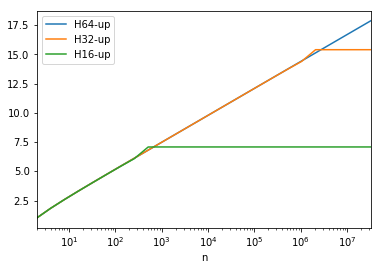

In [5]:
## Using this function and testing various values of n (n goes from 2**1 to 2**25)
## Making a dataframe with the data as we iterate

import pandas
%matplotlib inline


x = numpy.empty(shape=(25,),
                dtype=[("n", "int64"),
                       ("H64-up", "float64"),
                       ("H32-up", "float32"),
                       ("H16-up", "float16"),
                       ("time-up", "float32")])
Hns = pandas.DataFrame(x) ##, columns=["n", "H64-up", "H32-up", "H16-up", "time-up"])

Hns["n"] = numpy.fromfunction(lambda i : 2**(i+1), shape=x.shape, dtype="int64")

for i in Hns.index :
##    print(i, " :", Hns["n"][i], "type :", numpy.dtype(Hns["n"][i]))
    (H64, H32, H16, tu) = Hn_simple_up(Hns["n"][i], quiet=False)
    Hns.loc[i, ["H64-up", "H32-up", "H16-up", "time-up"]] = (H64, H32, H16, tu) 
    
print(Hns)
Hns.loc[::, 
       ["n", "H64-up", "H32-up", "H16-up"]
       ].plot("n", logx=True)

n=2 :  1.443 < H64= 1.000, H32= 1.000, H16= 1.000 <  1.693 (in 0.000s)
n=4 :  2.011 < H64= 1.833, H32= 1.833, H16= 1.833 <  2.386 (in 0.000s)
n=8 :  2.642 < H64= 2.593, H32= 2.593, H16= 2.594 <  3.079 (in 0.000s)
n=16 :  3.304 < H64= 3.318, H32= 3.318, H16= 3.318 <  3.773 (in 0.000s)
n=32 :  3.981 < H64= 4.027, H32= 4.027, H16= 4.027 <  4.466 (in 0.000s)
n=64 :  4.667 < H64= 4.728, H32= 4.728, H16= 4.727 <  5.159 (in 0.001s)
n=128 :  5.356 < H64= 5.425, H32= 5.425, H16= 5.430 <  5.852 (in 0.001s)
n=256 :  6.047 < H64= 6.120, H32= 6.120, H16= 6.117 <  6.545 (in 0.002s)
n=512 :  6.739 < H64= 6.815, H32= 6.815, H16= 6.816 <  7.238 (in 0.004s)
n=1024 :  7.432 < H64= 7.508, H32= 7.508, H16= 7.496 <  7.931 (in 0.011s)
n=2048 :  8.125 < H64= 8.202, H32= 8.202, H16= 8.219 <  8.625 (in 0.028s)
n=4096 :  8.818 < H64= 8.895, H32= 8.895, H16= 8.812 <  9.318 (in 0.047s)
n=8192 :  9.511 < H64= 9.588, H32= 9.588, H16= 9.797 < 10.011 (in 0.073s)
n=16384 : 10.204 < H64=10.281, H32=10.281, H16= 9.797 < 

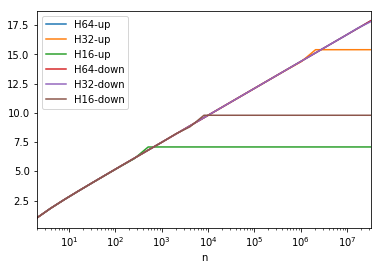

In [6]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[("H64-down", "float64"),
                       ("H32-down", "float32"),
                       ("H16-down", "float16"),
                       ("time-down", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_simple_down(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)
Hns.loc[::, 
       ["n", "H64-up", "H32-up", "H16-up", "H64-down", "H32-down", "H16-down"]
       ].plot("n", logx=True)

## Performing the summation in a stepwise method

The idea here is to start summing once the addition of the new factor is making no more differences

In [7]:
def Hn_step1_up(n, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []

    #### Code comes here to perform the summation in a stepwise manner
    #### Using the Hs list as a stack to record intermediate partial sums.
    Hs.append(f16(0)) #inititialise the first Hs
    current_ind = 0
    
    for i in range(n-1, 0, -1) : #We sum smallest elements first
        if (Hs[current_ind] + f16(1/i) != Hs[current_ind]) : #Check if adding next 1/i makes a difference
            Hs[current_ind] += f16(1/i) #If it does, add it to current partial sum
        else :
            Hs.append(f16(1/i))#If it doesnt, create new partial sum
            current_ind += 1
    

    for H in Hs:
        H16 += H

    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (sum depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16, math.log(n)+1, len(Hs), (time.perf_counter()-start_time)))
    return(H16, len(Hs), (time.perf_counter()-start_time))

Hn_step1_up(500000)

n=500000 : 13.622 < H16=14.555 < 14.122 (sum depth 192, in 0.730s)


(14.555, 192, 0.7300445507078166)

And using a loop to test this function with multiple values of $n$ :

n=2 :  1.443 < H16= 1.000 <  1.693 (sum depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (sum depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.594 <  3.079 (sum depth 1, in 0.000s)
n=16 :  3.304 < H16= 3.318 <  3.773 (sum depth 1, in 0.000s)
n=32 :  3.981 < H16= 4.027 <  4.466 (sum depth 1, in 0.000s)
n=64 :  4.667 < H16= 4.727 <  5.159 (sum depth 1, in 0.000s)
n=128 :  5.356 < H16= 5.430 <  5.852 (sum depth 1, in 0.000s)
n=256 :  6.047 < H16= 6.117 <  6.545 (sum depth 1, in 0.000s)
n=512 :  6.739 < H16= 6.816 <  7.238 (sum depth 1, in 0.001s)
n=1024 :  7.432 < H16= 7.496 <  7.931 (sum depth 1, in 0.002s)
n=2048 :  8.125 < H16= 8.219 <  8.625 (sum depth 1, in 0.009s)
n=4096 :  8.818 < H16= 8.812 <  9.318 (sum depth 1, in 0.006s)
n=8192 :  9.511 < H16=10.133 < 10.011 (sum depth 2, in 0.012s)
n=16384 : 10.204 < H16=11.039 < 10.704 (sum depth 5, in 0.025s)
n=32768 : 10.897 < H16=11.328 < 11.397 (sum depth 12, in 0.059s)
n=65536 : 11.590 < H16=12.234 < 12.090 (sum depth 24, in 0.113s)
n=131

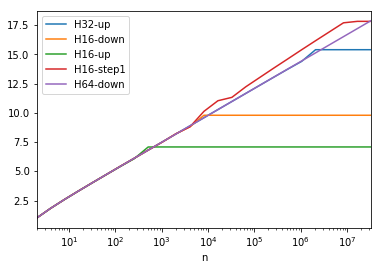

In [8]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step1", "float16"),
                        ("step1-sum-depth", "int32"),
                        ("time-step1", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step1_up(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)
Hns.loc[::, 
       ["n", "H32-up", "H16-down", "H16-up", "H16-step1", "H64-down"]
       ].plot("n", logx=True)

This produces a much better estimation, though it clearly provide an overestimation of $H_n$.

This bias is due to the fact that the summation is _stepped_ as soon as there is a risk of underestimation while continuing in the same _step_ as long as we have over-estimation.

To avoid this problem of over-estimation bias, a solution is to stop accumulating on the current accumulator before before we might make a biased choice, that is before we end-up stop completely the accumulation

## Stepwise with a _precision threshold_

In this case we stop when the new value is below a thresholded fraction of the current accumulator

In [9]:
def Hn_step2_up(n, inv_thresh=2**7, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []

    #### Code comes here to perform the summation in a stepwise manner
    #### Using the Hs list as a stack to record intermediate partial sums.
    
    Hs.append(f16(0)) #inititialise the first Hs
    current_ind = 0
    
    for i in range(1, n, 1) :
        if (f16(1/i) > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
            Hs[current_ind] += f16(1/i) #If it does, add it to current partial sum
        else :
            Hs.append(f16(1/i)) #If it doesnt, create new partial sum
            current_ind += 1
    
    for H in Hs:
        H16 += H

    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (sum depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16, math.log(n)+1, len(Hs), (time.perf_counter()-start_time)))
    return(H16, len(Hs), (time.perf_counter()-start_time))

Hn_step2_up(500000)

n=500000 : 13.622 < H16=11.234 < 14.122 (sum depth 3900, in 5.065s)


(11.234, 3900, 5.06539947025226)

Doing the test over values of $n$ :

n=2 :  1.443 < H16= 1.000 <  1.693 (sum depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (sum depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.590 <  3.079 (sum depth 1, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (sum depth 1, in 0.000s)
n=32 :  3.981 < H16= 4.023 <  4.466 (sum depth 1, in 0.000s)
n=64 :  4.667 < H16= 4.727 <  5.159 (sum depth 2, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (sum depth 3, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (sum depth 4, in 0.004s)
n=512 :  6.739 < H16= 6.812 <  7.238 (sum depth 6, in 0.007s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (sum depth 11, in 0.016s)
n=2048 :  8.125 < H16= 8.188 <  8.625 (sum depth 19, in 0.028s)
n=4096 :  8.818 < H16= 8.883 <  9.318 (sum depth 35, in 0.044s)
n=8192 :  9.511 < H16= 9.570 < 10.011 (sum depth 67, in 0.081s)
n=16384 : 10.204 < H16=10.234 < 10.704 (sum depth 132, in 0.183s)
n=32768 : 10.897 < H16=11.227 < 11.397 (sum depth 259, in 0.339s)
n=65536 : 11.590 < H16=11.234 < 12.090 (sum depth 515, in 0.666

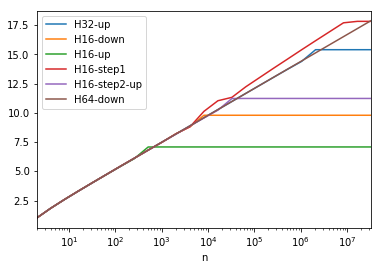

In [10]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step2-up", "float16"),
                        ("step2-up-sum-depth", "int32"),
                        ("time-step2-up", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step2_up(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)
Hns.loc[::, 
       ["n", "H32-up", "H16-down", "H16-up", "H16-step1", "H16-step2-up", "H64-down"]
       ].plot("n", logx=True)

The problems lies in the large number of _intermediate sums_ which are all very small in values. We might get a better results by summing those _intermediate sums_ in reverse order :

In [11]:
def Hn_step2_down(n, inv_thresh=2**7, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []
    Hs.append(f16(0))
    current_ind = 0
    #### Code comes here to perform the summation in a stepwise manner
    #### Using the Hs list as a stack to record intermediate partial sums.
    for i in range(1, n, 1) :
        if (1/i > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
            Hs[current_ind] += f16(1/i) #If it does, add it to current partial sum
        else :
            Hs.append(f16(1/i)) #If it doesnt, create new partial sum
            current_ind += 1
    
    for H in Hs[::-1]: # indeed when using the Hs (in forward order) we have difficulties due to 
        ## relative values of Hs from left to right
        H16 += H

    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (sum depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16, math.log(n)+1, len(Hs), (time.perf_counter()-start_time)))
    return(H16, len(Hs), (time.perf_counter()-start_time))

Hn_step2_down(500000)

n=500000 : 13.622 < H16=13.625 < 14.122 (sum depth 3897, in 4.229s)


(13.625, 3897, 4.228990309851724)

n=2 :  1.443 < H16= 1.000 <  1.693 (sum depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (sum depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.590 <  3.079 (sum depth 1, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (sum depth 1, in 0.000s)
n=32 :  3.981 < H16= 4.023 <  4.466 (sum depth 1, in 0.000s)
n=64 :  4.667 < H16= 4.727 <  5.159 (sum depth 2, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (sum depth 3, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (sum depth 4, in 0.002s)
n=512 :  6.739 < H16= 6.812 <  7.238 (sum depth 6, in 0.005s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (sum depth 11, in 0.008s)
n=2048 :  8.125 < H16= 8.203 <  8.625 (sum depth 19, in 0.016s)
n=4096 :  8.818 < H16= 8.891 <  9.318 (sum depth 35, in 0.036s)
n=8192 :  9.511 < H16= 9.586 < 10.011 (sum depth 67, in 0.087s)
n=16384 : 10.204 < H16=10.273 < 10.704 (sum depth 131, in 0.181s)
n=32768 : 10.897 < H16=10.969 < 11.397 (sum depth 259, in 0.251s)
n=65536 : 11.590 < H16=11.664 < 12.090 (sum depth 515, in 0.517

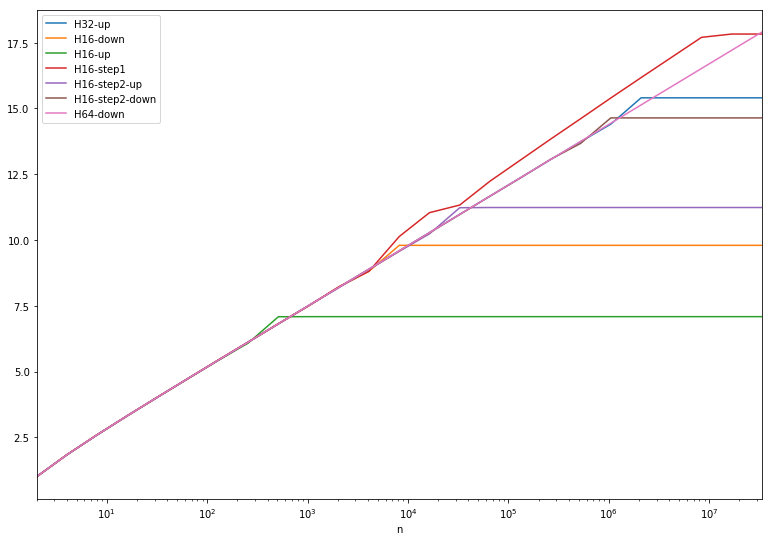

In [12]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step2-down", "float16"),
                        ("step2-down-sum-depth", "int32"),
                        ("time-step2-down", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step2_down(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)
Hns.loc[::, 
       ["n", "H32-up", "H16-down", "H16-up",
        "H16-step1", "H16-step2-up", "H16-step2-down",
        "H64-down"]
       ].plot("n", logx=True, figsize=(13, 9))

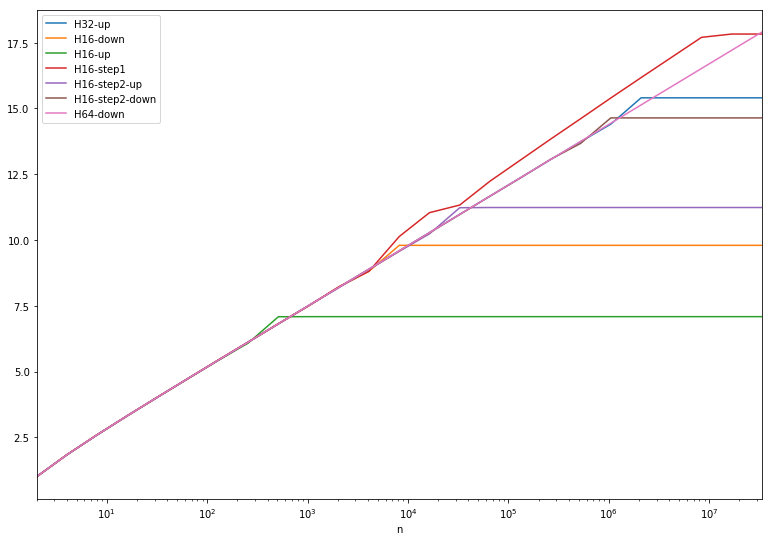

In [13]:
#### Getting the plot
Hns.loc[::, 
       ["n", "H32-up", "H16-down", "H16-up",
        "H16-step1", "H16-step2-up", "H16-step2-down",
        "H64-down"]
       ].plot("n", logx=True, figsize=(13, 9))

From $2^{20}$ onwards the sum stays constant as, when using float16, $1/n$ are evaluated as $0$. To push a bit further this limit one might want to _bias_ accordingly the floating point exponent in the float16 format

## Biasing the exponent of the float16 format
The idea here is to introduce a bias in the sum (_ie_ multiplying every element being summed by a _bias_ and finally divide the sum itself by the same _bias_).

In [14]:
def Hn_step2_bias(n, inv_thresh=2**7, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []
    exp_bias = 2**8
    f16_bias = f16(exp_bias) #We will be using float16
    Hs.append(f16(0))
    current_ind = 0

    #### Code comes here to perform the summation
    #### Using the Hs list as a stack to record intermediate partial sums.
    
    for i in range(1, n, 1) :
        if (f16_bias/i > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
            Hs[current_ind] += f16(f16_bias/i) #If it does, add it to current partial sum
        else :
            Hs.append(f16(1/i) * f16_bias) #If it doesnt, create new partial sum
            current_ind += 1
    
    for H in Hs[::-1]:
        H16 += H

    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (sum depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16/exp_bias, math.log(n)+1, len(Hs), (time.perf_counter()-start_time)))
    return(H16/exp_bias, len(Hs), (time.perf_counter()-start_time))

Hn_step2_bias(500000)

n=500000 : 13.622 < H16=13.617 < 14.122 (sum depth 3896, in 7.667s)


(13.6171875, 3896, 7.666694445858866)

In [15]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step2-bias", "float16"),
                        ("step2-bias-sum-depth", "int32"),
                        ("time-step2-bias", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step2_bias(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)

n=2 :  1.443 < H16= 1.000 <  1.693 (sum depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (sum depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.590 <  3.079 (sum depth 1, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (sum depth 1, in 0.000s)
n=32 :  3.981 < H16= 4.023 <  4.466 (sum depth 1, in 0.001s)
n=64 :  4.667 < H16= 4.727 <  5.159 (sum depth 2, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (sum depth 3, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (sum depth 4, in 0.009s)
n=512 :  6.739 < H16= 6.812 <  7.238 (sum depth 6, in 0.014s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (sum depth 11, in 0.024s)
n=2048 :  8.125 < H16= 8.203 <  8.625 (sum depth 19, in 0.034s)
n=4096 :  8.818 < H16= 8.891 <  9.318 (sum depth 35, in 0.065s)
n=8192 :  9.511 < H16= 9.586 < 10.011 (sum depth 67, in 0.135s)
n=16384 : 10.204 < H16=10.273 < 10.704 (sum depth 131, in 0.240s)
n=32768 : 10.897 < H16=10.969 < 11.397 (sum depth 259, in 0.520s)
n=65536 : 11.590 < H16=11.664 < 12.090 (sum depth 515, in 0.988

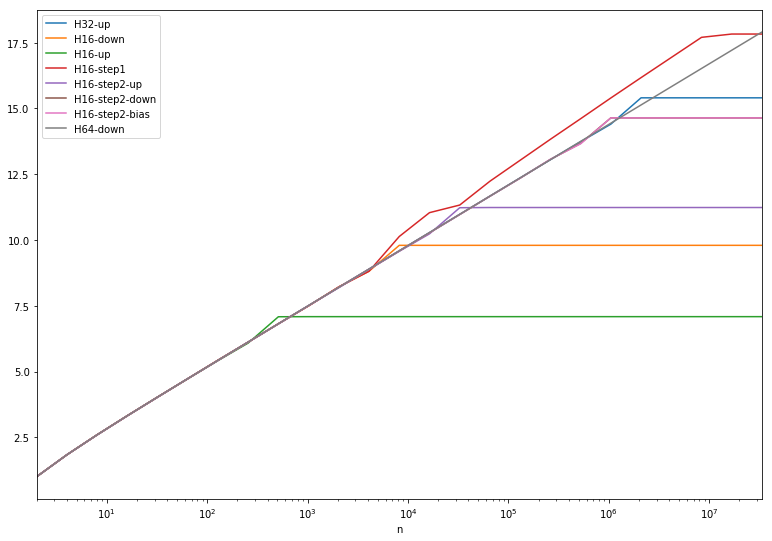

In [16]:
Hns.loc[::, 
       ["n", "H32-up", "H16-down", "H16-up",
        "H16-step1", "H16-step2-up", "H16-step2-down", "H16-step2-bias",
        "H64-down"]
       ].plot("n", logx=True, figsize=(13, 9))

## Limiting the depth of the stepping and accumulating comensurable values

The idea here is to increase the precision by _stepping_ earlier. This corresponds to the decrease of the inv_tresh parameter of the step2 functions. The problem then is that the stack that is used to store the _intermedaite sums_ tend to increase very rapidly. To avoid the large increase in the stack size, one can perform the _reduction_ of the stack _as soon as possible_.

The other advantage of this adaptative reduction of the stack of _intermedaite sums_ is that those are accumulated at times we are confident their total values are in equivalent ranges, hence producing limited round-off errors.

In [17]:
def Hn_step3_bias(n, inv_thresh=2**7, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []
    depth_max = 0
    exp_bias = 2**8
    f16_bias = f16(exp_bias)
    Hs.append(f16(0))
    current_ind = 0

    #### Code comes here to perform the summation
    #### Using the Hs list as a stack to record intermediate partial sums.
    
    for i in range(1, n, 1) :
        if (f16_bias/i > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
            Hs[current_ind] += f16(f16_bias/i) #If it does, add it to current partial sum
        else :
            if (current_ind == 0):
                Hs.append(f16(1/i) * f16_bias) #If only one element in stack, create new partial sum
                current_ind += 1
            else:
                if((Hs[current_ind] > Hs[current_ind-1]/inv_thresh)): #Check if last two sums are commensurable
                    Hs[current_ind - 1] += Hs[current_ind] #If they are, sum them.
                    Hs[current_ind] = f16(1/i) * f16_bias #New partial sum takes the place of old partial sum
                else:
                    Hs.append(f16(1/i) * f16_bias) #If last two sums are not commensurable, don't sum but create new partial sum
                    current_ind += 1
    
    Hs.sort()
    for H in Hs: 
        H16 += H 
    
    depth_max = len(Hs)
    
    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (max depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16/exp_bias, math.log(n)+1, depth_max, (time.perf_counter()-start_time)))
    return(H16/exp_bias, depth_max, (time.perf_counter()-start_time))

Hn_step3_bias(500000)

n=500000 : 13.622 < H16=13.688 < 14.122 (max depth 35, in 8.032s)


(13.6875, 35, 8.031906796568364)

In [18]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step3-a7", "float16"),
                        ("step3-a7-sum-depth", "int32"),
                        ("time-step3-a7", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step3_bias(Hns["n"][i], inv_thresh=2**7, quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns)

n=2 :  1.443 < H16= 1.000 <  1.693 (max depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (max depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.590 <  3.079 (max depth 1, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (max depth 1, in 0.000s)
n=32 :  3.981 < H16= 4.023 <  4.466 (max depth 1, in 0.001s)
n=64 :  4.667 < H16= 4.727 <  5.159 (max depth 2, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (max depth 2, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (max depth 2, in 0.008s)
n=512 :  6.739 < H16= 6.812 <  7.238 (max depth 2, in 0.013s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (max depth 2, in 0.022s)
n=2048 :  8.125 < H16= 8.188 <  8.625 (max depth 2, in 0.034s)
n=4096 :  8.818 < H16= 8.883 <  9.318 (max depth 3, in 0.065s)
n=8192 :  9.511 < H16= 9.578 < 10.011 (max depth 3, in 0.140s)
n=16384 : 10.204 < H16=10.266 < 10.704 (max depth 4, in 0.247s)
n=32768 : 10.897 < H16=10.961 < 11.397 (max depth 5, in 0.514s)
n=65536 : 11.590 < H16=11.656 < 12.090 (max depth 8, in 1.009s)
n=13107

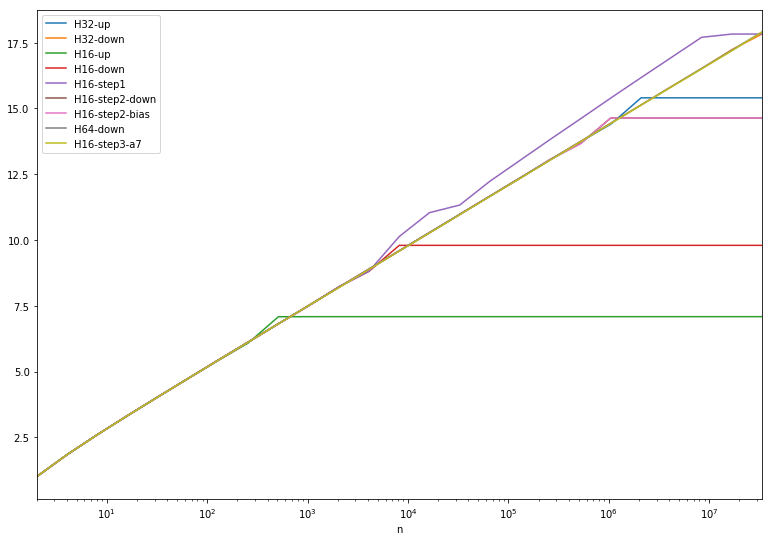

In [19]:
Hns.loc[::,
        ["n", "H32-up", "H32-down", "H16-up", "H16-down",
         "H16-step1", "H16-step2-down", "H16-step2-bias",
         "H64-down", "H16-step3-a7"]
       ].plot("n", logx=True, figsize=(13, 9))

And doing the same with performing the _stepping_ more often, hence reducing the effect of the loss of accuracy by adding a small value to an already _large intermediate sum_. This simply corresponds to lowering the inv_thresh in the Hn_step3_bias function.

In [20]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step3-a3", "float16"),
                        ("step3-a3-sum-depth", "int32"),
                        ("time-step3-a3", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step3_bias(Hns["n"][i], inv_thresh=2**3, quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns.loc[::,
        ["n", "H64-down", "H32-up", "H32-down", "H16-up", "H16-down",
         "H16-step1", "H16-step2-down", "H16-step2-bias",
         "H16-step3-a7", "H16-step3-a3"]])

n=2 :  1.443 < H16= 1.000 <  1.693 (max depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (max depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.592 <  3.079 (max depth 2, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (max depth 2, in 0.000s)
n=32 :  3.981 < H16= 4.023 <  4.466 (max depth 3, in 0.001s)
n=64 :  4.667 < H16= 4.727 <  5.159 (max depth 3, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (max depth 5, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (max depth 7, in 0.005s)
n=512 :  6.739 < H16= 6.812 <  7.238 (max depth 11, in 0.010s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (max depth 19, in 0.020s)
n=2048 :  8.125 < H16= 8.203 <  8.625 (max depth 35, in 0.034s)
n=4096 :  8.818 < H16= 8.891 <  9.318 (max depth 67, in 0.067s)
n=8192 :  9.511 < H16= 9.578 < 10.011 (max depth 130, in 0.156s)
n=16384 : 10.204 < H16=10.281 < 10.704 (max depth 251, in 0.320s)
n=32768 : 10.897 < H16=10.984 < 11.397 (max depth 482, in 0.570s)
n=65536 : 11.590 < H16=11.672 < 12.090 (max depth 945, in 1.2

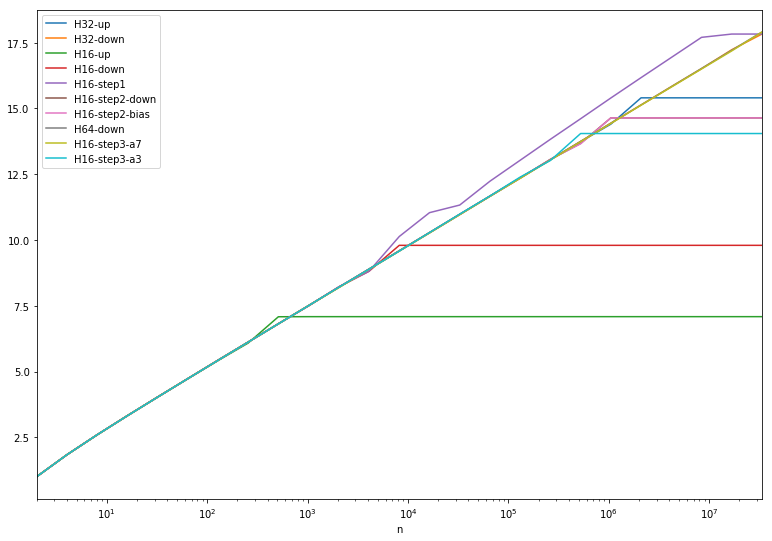

In [21]:
Hns.loc[::,
        ["n", "H32-up", "H32-down", "H16-up", "H16-down",
         "H16-step1", "H16-step2-down", "H16-step2-bias",
         "H64-down", "H16-step3-a7", "H16-step3-a3"]
       ].plot("n", logx=True, figsize=(13, 9))

## Removing the _exponent bias_ to see if it is really useful

At some point earlier we have used a multiplicative bias to try to use as best as possible the exponent dynomic of the float16 (IEEE754) format. It would be interesting to see to what level this is required.

In [22]:
def Hn_step3_bias(n, inv_thresh=2**7, exp_bias = 2**8, quiet=False) :
    start_time = time.perf_counter()
    f16 = numpy.float16

    H16 = f16(0)
    Hs = []
    depth_max = 0
    f16_bias = f16(exp_bias)
    Hs.append(f16(0))
    current_ind = 0

    #### Code comes here to perform the summation
    #### Using the Hs list as a stack to record intermediate partial sums.
    
    for i in range(1, n, 1) :
        if (f16_bias/i > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
            Hs[current_ind] += f16(f16_bias/i) #If it does, add it to current partial sum
        else :
            if (current_ind == 0):
                Hs.append(f16(1/i) * f16_bias) #If only one element in stack, create new partial sum
                current_ind += 1
            else:
                if((Hs[current_ind] > Hs[current_ind-1]/inv_thresh)): #Check if last two sums are commensurable
                    Hs[current_ind - 1] += Hs[current_ind] #If they are, sum them.
                    Hs[current_ind] = f16(1/i) * f16_bias #New partial sum takes the place of old partial sum
                else:
                    Hs.append(f16(1/i) * f16_bias) #If last two sums are not commensurable, don't sum but create new partial sum
                    current_ind += 1
    
    Hs.sort()
    for H in Hs: 
        H16 += H 
    
    depth_max = len(Hs)
    
    if not quiet :
        print("n=%d : %6.3f < H16=%6.3f < %6.3f (max depth %d, in %.3fs)" % 
              (n, math.log(n)+.5+.5/n, H16/exp_bias, math.log(n)+1, depth_max, (time.perf_counter()-start_time)))
    return(H16/exp_bias, depth_max, (time.perf_counter()-start_time))

Hn_step3_bias(500000, exp_bias=1)

n=500000 : 13.622 < H16=13.688 < 14.122 (max depth 35, in 8.110s)


(13.6875, 35, 8.109713712852681)

In [23]:
x = numpy.empty(shape=(Hns.shape[0],),
                dtype=[ ("H16-step3-a3-nob", "float16"),
                        ("step3-a3-nob-sum-depth", "int32"),
                        ("time-step3-a3-nob", "float32")])

Hns_new = pandas.DataFrame(x)

for i in Hns.index :
    Hns_new.loc[i, ::] = Hn_step3_bias(Hns["n"][i], inv_thresh=2**3, exp_bias=1, quiet=False)

Hns = pandas.concat([Hns, Hns_new], axis=1)
print(Hns.loc[::,
        ["n", "H64-down", "H16-step3-a3", "H16-step3-a3-nob", "H16-step2-down",
         "H32-up", "H16-step3-a7"]])

n=2 :  1.443 < H16= 1.000 <  1.693 (max depth 1, in 0.000s)
n=4 :  2.011 < H16= 1.833 <  2.386 (max depth 1, in 0.000s)
n=8 :  2.642 < H16= 2.592 <  3.079 (max depth 2, in 0.000s)
n=16 :  3.304 < H16= 3.316 <  3.773 (max depth 2, in 0.001s)
n=32 :  3.981 < H16= 4.023 <  4.466 (max depth 3, in 0.001s)
n=64 :  4.667 < H16= 4.727 <  5.159 (max depth 3, in 0.001s)
n=128 :  5.356 < H16= 5.422 <  5.852 (max depth 5, in 0.002s)
n=256 :  6.047 < H16= 6.117 <  6.545 (max depth 7, in 0.004s)
n=512 :  6.739 < H16= 6.812 <  7.238 (max depth 11, in 0.008s)
n=1024 :  7.432 < H16= 7.504 <  7.931 (max depth 19, in 0.017s)
n=2048 :  8.125 < H16= 8.203 <  8.625 (max depth 35, in 0.033s)
n=4096 :  8.818 < H16= 8.891 <  9.318 (max depth 67, in 0.069s)
n=8192 :  9.511 < H16= 9.578 < 10.011 (max depth 130, in 0.138s)
n=16384 : 10.204 < H16=10.281 < 10.704 (max depth 251, in 0.284s)
n=32768 : 10.897 < H16=10.984 < 11.397 (max depth 483, in 0.520s)
n=65536 : 11.590 < H16=11.672 < 12.090 (max depth 945, in 1.0

## Indefinite range computation

Using the scheme of the **step3** version of the summation we can compute for an _infinite range_, that is print from time to time while letting the summation run until a keyboard interrupt (or any other interupt) is send to the process. This can be done on both the **step3** version and on _naive sum up_ version, preferrably using float64 precision to have some chance that this one is close to the true value.

In [24]:
## Implementing the summation in the «naive» way
import math
import numpy

import itertools ## infinite generator :

## short hands for explicit type conversion functions :
f16 = numpy.float16
f64 = numpy.float64

## Starting the computation itself (and its timing) :
start_time = time.perf_counter()

## For the /naive/ sum up, using float64 precision :
H64 = f64(0)
## For the /adaptative stepped/ sum 'up/down', using float16 precision :
H16 = f16(0)
Hs = []
depth_max = 0
exp_bias = f16(2**8)
inv_thresh = f16(2**3)
current_ind = 0
Hs.append(f16(0))

## Recording results in a pandas.DataFrame as the computation goes on :
x = numpy.empty(shape=(0,),
                dtype=[ ("n", "int64"),
                        ("H64-up", "float64"),
                        ("H16-adapt", "float16"),
                        ("H16-depth-max", "int16"),
                        ("time", "float32")])

Hns_inf = pandas.DataFrame(x)

## Performing an infinite for loop by using an endless generator :
for i in itertools.count(start=1, step=1) :
    ## float64, naive version :
    H64 += f64(1/i)
    
    ## float16 version, adapted from the step3 version (with exponent bias) :

    #### Code comes here to perform the summation as step3
    #### Using the Hs list as a stack to record intermediate partial sums.
    if (exp_bias/i > Hs[current_ind]/inv_thresh) : #Check if adding next 1/i makes significant a difference
        Hs[current_ind] += f16(exp_bias/i) #If it does, add it to current partial sum
    else :
        if (current_ind == 0):
            Hs.append(f16(1/i) * exp_bias) #If only one element in stack, create new partial sum
            current_ind += 1
        else:
            if((Hs[current_ind] > Hs[current_ind-1]/inv_thresh)): #Check if last two sums are commensurable
                Hs[current_ind - 1] += Hs[current_ind] #If they are, sum them.
                Hs[current_ind] = f16(1/i) * exp_bias #New partial sum takes the place of old partial sum
            else:
                Hs.append(f16(1/i) * exp_bias) #If last two sums are not commensurable, don't sum but create new partial sum
                current_ind += 1
    
    ## reporting when i is a power of 2 :
    if (i and not (i & (i-1) )):
        ## Finishing up the float16 computation (low cost) :
        H16_here = 0
        for H in Hs[::-1]: ## Summing the partial sum stack, «downward»
            H16_here += H
        ## Printing out :
        print("n=%d : %6.3f < H64-up=%6.3f, H16-adapt=%6.3f < %6.3f (in %.3fs, max depth %d), error=%6.3f%%" % 
              (i, math.log(i)+.5+.5/n, H64, H16_here/exp_bias, math.log(i)+1,
               (time.perf_counter()-start_time), depth_max,
              100*(H64 - f64(H16_here/exp_bias))/H64 ))
        ## Recording the current values in the Hns_inf data frame
        Hns_inf = Hns_inf.append({"n" : i,
                                  "H64-up" : H64,
                                  "H16-adapt" : H16_here/exp_bias,
                                  "H16-depth-max" :  depth_max,
                                  "time" : (time.perf_counter()-start_time)}, ignore_index=True)

n=1 :  0.500 < H64-up= 1.000, H16-adapt= 1.000 <  1.000 (in 0.040s, max depth 0), error= 0.000%
n=2 :  1.193 < H64-up= 1.500, H16-adapt= 1.500 <  1.693 (in 0.130s, max depth 0), error= 0.000%
n=4 :  1.886 < H64-up= 2.083, H16-adapt= 2.082 <  2.386 (in 0.133s, max depth 0), error= 0.062%
n=8 :  2.579 < H64-up= 2.718, H16-adapt= 2.717 <  3.079 (in 0.136s, max depth 0), error= 0.039%
n=16 :  3.273 < H64-up= 3.381, H16-adapt= 3.379 <  3.773 (in 0.138s, max depth 0), error= 0.047%
n=32 :  3.966 < H64-up= 4.058, H16-adapt= 4.057 <  4.466 (in 0.140s, max depth 0), error= 0.046%
n=64 :  4.659 < H64-up= 4.744, H16-adapt= 4.741 <  5.159 (in 0.142s, max depth 0), error= 0.059%
n=128 :  5.352 < H64-up= 5.433, H16-adapt= 5.430 <  5.852 (in 0.146s, max depth 0), error= 0.052%
n=256 :  6.045 < H64-up= 6.124, H16-adapt= 6.122 <  6.545 (in 0.149s, max depth 0), error= 0.041%
n=512 :  6.738 < H64-up= 6.817, H16-adapt= 6.814 <  7.238 (in 0.154s, max depth 0), error= 0.036%
n=1024 :  7.431 < H64-up= 7.509

KeyboardInterrupt: 

Since the results are taking time to compute it is worth saving the python object as such to be able to use it later.

In [ ]:
print(Hns_inf)
import pickle
## Once used the following line is commented out to reduce the risk of overwritting the file
## created initially.
##Hns_inf.to_pickle("Hns_inf.pickle")

From now on, as the results are saved/serialised to the «Hns_inf.pickle» file we can get those back directly through a call to the «read_pickle» :

In [ ]:
import pandas
Hns_read = pandas.read_pickle("Hns_inf.pickle")
print(Hns_read)

## Using the power of numpy

A _last_ solution is to delegate the complete computation (summation) to numpy specialised functions

In [ ]:
import math
import numpy
import time ## for function timing support

def Hn_numpy_up(n, quiet=False) :
    f16 = numpy.float16
    f32 = numpy.float32
    f64 = numpy.float64

    start_time = time.perf_counter()

    l16 = numpy.arange(1, n, dtype='float16')
    inv16 = numpy.reciprocal(l16) ## Computing the 1/i, called «reciprocal» in computer language.

    l32 = numpy.arange(1, n, dtype='float32')
    inv32 = numpy.reciprocal(l32)

    l64 = numpy.arange(1, n, dtype='float64')
    inv64 = numpy.reciprocal(l64)

    H16 = numpy.add.reduce(inv16)
    H32 = numpy.add.reduce(inv32)
    H64 = numpy.add.reduce(inv64)

    if not quiet :
        print("n=%d : %6.3f < H64=%6.3f, H32=%6.3f, H16=%6.3f < %6.3f (in %.3fs)" %
              (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1, (time.perf_counter()-start_time)))
    return(H64, H32, H16, (time.perf_counter()-start_time))

Hn_numpy_up(500000)

Obviously this gives a bit better results in term of quality of the result than the naive summation but is far from perfect. Though the timing of the sum is much better than what we got by performing a naive summation (*Hn_simple_up*). Indeed the computation is between 20x and 50x faster using the numpy summation/reduction function.

To enhance the precision of the result one can, again, try to arrange the values in a better order for the summation by putting the values in ascending order in the collection that will be reduced :

In [ ]:
import math
import numpy
import time ## for function timing support

def Hn_numpy_down(n, quiet=False) :
    f16 = numpy.float16
    f32 = numpy.float32
    f64 = numpy.float64

    start_time = time.perf_counter()

    l16 = numpy.arange(1, n, dtype='float16')
    inv16 = numpy.reciprocal(l16) ## Computing the 1/i, called «reciprocal» in computer language.

    l32 = numpy.arange(1, n, dtype='float32')
    inv32 = numpy.reciprocal(l32)

    l64 = numpy.arange(1, n, dtype='float64')
    inv64 = numpy.reciprocal(l64)

    H16 = numpy.add.reduce(inv16[::-1])
    H32 = numpy.add.reduce(inv32[::-1])
    H64 = numpy.add.reduce(inv64[::-1])

    if not quiet :
        print("n=%d : %6.3f < H64=%6.3f, H32=%6.3f, H16=%6.3f < %6.3f (in %.3fs)" %
              (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1, (time.perf_counter()-start_time)))
    return(H64, H32, H16, (time.perf_counter()-start_time))

Hn_numpy_down(500000)

Obviously the result is strictly the same, bringing an evidence that most likely numpy is performing some type of data re-ordering before performing the summation. Hence the summation is practically performed in an order which is not directly related to the one used to submit the sum but in an order which is most the time enabling the lagorithm to provide more precise results.

### Applying an _exponent bias_ within the use of numpy summation

While this is most likely useless, we can rather simply introduce a exponent bias in the summation using the numpy functions :

In [ ]:
import math
import numpy
import time ## for function timing support

def Hn_numpy_bias_down(n, exp_bias = 2**8, quiet=False) :
    f16 = numpy.float16
    f32 = numpy.float32
    f64 = numpy.float64

    start_time = time.perf_counter()
    rec_bias = 1.0/exp_bias

    l16 = numpy.arange(1, n, dtype='float16')
    inv16 = numpy.reciprocal(l16 * f16(rec_bias))

    ### Fill in here, producing the l32, inv32, l64 and inv64 arrays.
    
    l32 = numpy.arange(1, n, dtype='float32')
    inv32 = numpy.reciprocal(l32 * f32(rec_bias))
    
    l64 = numpy.arange(1, n, dtype='float64')
    inv64 = numpy.reciprocal(l64 * f64(rec_bias))
    
    H16 = f16(rec_bias) * numpy.add.reduce(inv16[::-1])
    ### Fill in here, producing H32 and H64 on the same model
    H32 = f32(rec_bias) * numpy.add.reduce(inv32[::-1])
    H64 = f64(rec_bias) * numpy.add.reduce(inv64[::-1])
    
    
    if not quiet :
        print("n=%d : %6.3f < H64=%6.3f, H32=%6.3f, H16=%6.3f < %6.3f (in %.3fs)" %
              (n, math.log(n)+.5+.5/n, H64, H32, H16, math.log(n)+1, (time.perf_counter()-start_time)))
    return(H64, H32, H16, (time.perf_counter()-start_time))

Hn_numpy_down(500000)

Clearly, and as expected, no changes in the results. This is expected since the exponent bias only use is to reach values of _i_ so big that _1/i_ is null due to exponent limitations. This is not the case fot _n=500000_.

We can still record all the results produced by these new _numpy using_ function in the data frame along with the figures collected using methods not using numpy

In [ ]:
x_1 = numpy.empty(shape=(Hns.shape[0],),
                  dtype=[("H16-numpy-up", "float16"),
                         ("H32-numpy-up", "float32"),
                         ("H64-numpy-up", "float64"),
                         ("numpy-up-time", "float32")])
x_2 = numpy.empty(shape=(Hns.shape[0],),
                  dtype=[("H16-numpy-bias", "float16"),
                         ("H32-numpy-bias", "float32"),
                         ("H64-numpy-bias", "float64"),
                         ("numpy-bias-time", "float32")])

Hns_new_1 = pandas.DataFrame(x_1)
Hns_new_2 = pandas.DataFrame(x_2)

for i in Hns.index :
    Hns_new_1.loc[i, ::] = Hn_numpy_up(Hns["n"][i], quiet=False)
    Hns_new_2.loc[i, ::] = Hn_numpy_bias_down(Hns["n"][i], quiet=False)

Hns = pandas.concat([Hns, Hns_new_1, Hns_new_2], axis=1)
print(Hns.loc[::,
        ["n", "H16-numpy-up", "H32-numpy-up", "H64-numpy-up", "numpy-up-time",
         "H16-numpy-bias", "H32-numpy-bias", "H64-numpy-bias", "numpy-bias-time"]])

And displaying the results in a figure

In [ ]:
Hns.loc[::,
        ["n", "H32-up", "H16-down", "H16-up",
         "H16-numpy-up", "H32-numpy-up", "H64-numpy-up",
         "H16-numpy-bias", "H32-numpy-bias", "H64-numpy-bias",
         "H64-down"]
       ].plot("n", logx=True, figsize=(13, 9))